In [1]:
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# START WITH SLIDES
$ \\ $
$ \\ $$ \\ $$ \\ $
$ \\ $
$ \\ $
-

# PART I: MOTIVATION

# $ \\ $
# $ \\ $
# $ \\ $

# PART II: A SIMPLE TEXT CLASSIFICATION PROBLEM AND BAG OF WORDS

## Let's look at some text

In [3]:
import numpy as np
import pandas as pd

from keras.datasets import imdb, reuters
from sklearn.datasets import fetch_20newsgroups

Using TensorFlow backend.


### From: http://people.csail.mit.edu/jrennie/20Newsgroups/


#### The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of my knowledge, it was originally collected by Ken Lang, probably for his Newsweeder: Learning to filter netnews paper, though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

## Available Categories:
 - alt.atheism
 - comp.graphics
 - comp.os.ms-windows.misc
 - comp.sys.ibm.pc.hardware
 - comp.sys.mac.hardware
 - comp.windows.x
 - misc.forsale
 - rec.autos
 - rec.motorcycles
 - rec.sport.baseball
 - rec.sport.hockey
 - sci.crypt
 - sci.electronics
 - sci.med
 - sci.space
 - soc.religion.christian
 - talk.politics.guns
 - talk.politics.mideast
 - talk.politics.misc
 - talk.religion.misc

In [4]:
data = fetch_20newsgroups(
    subset='train', 
    categories=['sci.med', 'comp.windows.x']
)

In [5]:
dir(data)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [6]:
for attr in dir(data):
    print('{}: {}'.format(attr, type(getattr(data, attr)).__name__))

DESCR: str
data: list
filenames: ndarray
target: ndarray
target_names: list


In [7]:
data.description

AttributeError: description

In [8]:
data.target_names

['comp.windows.x', 'sci.med']

In [9]:
print(data.data[1])

From: urathi@net4.ICS.UCI.EDU (Unmesh Rathi)
Subject: Motif++ and Interviews
Lines: 12

Hi,
	I am in the process of making the decision whether I should
write c++ wrappers for motif myself or use Motif++ or Interviews.
Though I have downloaded the tar files, I fail to see any
documentation. I have two questions:
	1) If you have used these or similar c++sy toolkits what has been
your experience?
	2) Where do I find reference books /documentation for them?

any and all input will be greatly appreciated.

/unmesh



In [10]:
data = fetch_20newsgroups(
    subset='all', 
    categories=['sci.med', 'comp.windows.x'], 
    remove=('headers', 'footers', 'quotes')  # remove crud
)

In [11]:
print(data.data[10])

I know that there is a relationship between Fibromyalgia and deep 
sleep.  I believe that there are five levels of sleep.  I think 
that R.E.M. sleep is the third deepest level of sleep and that 
there are two deeper levels of sleep.  If I am in error in any of 
this, please let me know.

Which level of sleep is thought to be deficient in people with 
Fibromyalgia?  Are there any known sleep disturbances associated 
with CFS?  What sleep disturbances (if any) are associated with 
clinical depression?  Do antidepressants correct the sleep 
disturbances in these diseases?  Are there any good books or 
medical journal articles about sleep disturbances and these 
diseases?  Thank you in advance for all replies.


# Approach: Turn text into numbers by counting
## This is a simple and VERY powerful approach for working with text
$ \\ $ 
$ \\ $ 
$ \\ $ 
$ \\ $ 
# GO TO SLIDES
$ \\ $ 
$ \\ $ 

In [12]:
text = data.data[10]
print(text)

I know that there is a relationship between Fibromyalgia and deep 
sleep.  I believe that there are five levels of sleep.  I think 
that R.E.M. sleep is the third deepest level of sleep and that 
there are two deeper levels of sleep.  If I am in error in any of 
this, please let me know.

Which level of sleep is thought to be deficient in people with 
Fibromyalgia?  Are there any known sleep disturbances associated 
with CFS?  What sleep disturbances (if any) are associated with 
clinical depression?  Do antidepressants correct the sleep 
disturbances in these diseases?  Are there any good books or 
medical journal articles about sleep disturbances and these 
diseases?  Thank you in advance for all replies.


In [13]:
words = text.split() # this is a built-in function of Python
words[:10]

['I',
 'know',
 'that',
 'there',
 'is',
 'a',
 'relationship',
 'between',
 'Fibromyalgia',
 'and']

## Recipe:
 - Standardize vocabulary: find all the unique words
 - Turn documents into numbers by counting words
 
## This effectively one-hot-encodes the words
## $D$ documents will become a $D \text{ x } N_{words}$ matrix
### where $N_{words}$ is the number of unique words in the text.


## This is often called a "term-document matrix"

In [14]:
unique_words = list(set(words))
len(unique_words)

72

In [15]:
# Let's turn a single document into a vector
document_vector = np.zeros(len(unique_words), dtype=np.int64)
for word in words:
    index = unique_words.index(word) # at this step you create a number from the word
    document_vector[index] += 1
pd.Series(document_vector, index=unique_words).sort_values(ascending=False)

sleep              7
there              5
of                 5
in                 5
that               4
disturbances       4
I                  4
and                3
sleep.             3
are                3
any                3
is                 3
with               3
associated         2
level              2
the                2
levels             2
Are                2
diseases?          2
these              2
think              1
(if                1
known              1
thought            1
all                1
deeper             1
any)               1
you                1
journal            1
deepest            1
                  ..
know.              1
let                1
third              1
relationship       1
for                1
depression?        1
this,              1
please             1
antidepressants    1
If                 1
deep               1
or                 1
Fibromyalgia       1
to                 1
believe            1
advance            1
medical      

## Pure python implementation

In [16]:
# Count all the unique words in the data (takes ~2s)
unique_words = set()
for text in data.data:
    words = text.split()
    unique_words = unique_words.union(words)
unique_words = list(set(unique_words))
print(len(unique_words))

60045


## How big will our document matrix be?
## $D \text{ x }N_{words} \text{ x }\frac{8Bytes}{int}$

In [17]:
print('{:.2f}MB'.format(len(data.data) * len(unique_words) * 8 / 1024 / 1024))

906.14MB


In [1]:
# DO NOT RUN THE CELL BELOW!

In [ ]:
# DO NOT RUN
term_doc_matrix = np.zeros((len(data.data), len(unique_words)))
for document_index, text in enumerate(data.data):
    words = text.split()
    for word in words:
        word_index = unique_words.index(word)
        term_doc_matrix[document_index, word_index] += 1

# Question: how many of these entries will be non-zero?
 - How many unique words, how many words per document?

## Thankfully, this has been implemented better than we can, with numpy
 - Only pass through the data once!
 - Use sparse matrices!

In [18]:
data_train = fetch_20newsgroups(
    subset='train', 
    categories=['sci.med', 'comp.windows.x'], 
    remove=('headers', 'footers', 'quotes')
)
data_test = fetch_20newsgroups(
    subset='test', 
    categories=['sci.med', 'comp.windows.x'], 
    remove=('headers', 'footers', 'quotes')
)

In [19]:
data_train.target.mean()

0.5004212299915753

### Sklearn `CountVectorizer`
 - turns words into vectors of word counts

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer?

## Recipe:
 - Make a `CountVectorizer`
 - `fit` it: (i.e. find all the unique words)
 - use it to turn __each__ document into a vector of words counts

In [21]:
vec = CountVectorizer(lowercase=False)
vec.fit(data_train.data)
term_document_matrix_train = vec.transform(data_train.data)
term_document_matrix_test = vec.transform(data_test.data)

type(term_document_matrix_train)

scipy.sparse.csr.csr_matrix

In [32]:
# What does CountVectorizer do:
# in vec.transform(data_train.data) you take the data of the data_train dataset (remember that data_train.data[0] gives you first
# text passage of data_train dataset) and transforms the words into numbers and the numbers are then put in vector form
# e.g.    The(2)     cat(14)     home(4)      house(105)
# doc1    3          1           18           0               (original sentence: The cat is home the home the home)
# doc2    2          1           0            1               (original sentence: The cat is fat because it is in the house)

In [26]:
term_document_matrix_train.shape
# 1187: number of documents in dataset
# 24958: number of unique words in all the 1187 documents

(1187, 24958)

In [30]:
term_document_matrix_train[4]

<1x24958 sparse matrix of type '<class 'numpy.int64'>'
	with 73 stored elements in Compressed Sparse Row format>

## OK, so how many of the elements will be non-zero?

In [28]:
(term_document_matrix_train > 0).mean()

0.004324400629114213

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()
lr.fit(term_document_matrix_train, data_train.target)
lr_preds = lr.predict(term_document_matrix_test)
print('accuracy {:.4f}'.format(accuracy_score(data_test.target, lr_preds)))
print('f1 {:.4f}'.format(f1_score(data_test.target, lr_preds)))

accuracy 0.9090
f1 0.9122


In [33]:
lr_coefs = pd.Series(lr.coef_.squeeze(), 
                     index=vec.get_feature_names())
lr_coefs[lr_coefs.abs().nlargest(20).index]

window    -1.193121
Hi        -0.984980
server    -0.932611
Motif     -0.888545
windows   -0.884611
use       -0.873152
using     -0.849678
do        -0.811083
set       -0.785463
problem   -0.736265
MSG        0.720845
user      -0.713934
running   -0.712697
version   -0.701494
code      -0.700811
X11R5     -0.698192
list      -0.667127
widget    -0.666384
clients   -0.656623
instead   -0.647548
dtype: float64

# These tasks can get harder: what if the topics are more similar? 

In [34]:

data_train = fetch_20newsgroups(
    subset='train', 
    categories=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'], 
    remove=('headers', 'footers', 'quotes')
)
data_test = fetch_20newsgroups(
    subset='test', 
    categories=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'], 
    remove=('headers', 'footers', 'quotes')
)


vec = CountVectorizer(lowercase=False, )
vec.fit(data_train.data)
term_document_matrix_train = vec.transform(data_train.data)
term_document_matrix_test = vec.transform(data_test.data)

lr = LogisticRegression()
lr.fit(term_document_matrix_train, data_train.target)

lr_preds = lr.predict(term_document_matrix_test)
print('accuracy {:.4f}'.format(accuracy_score(data_test.target, lr_preds)))
print('f1 {:.4f}'.format(f1_score(data_test.target, lr_preds)))

accuracy 0.7979
f1 0.8005


In [35]:
lr_coefs = pd.Series(lr.coef_.squeeze(), 
                     index=vec.get_feature_names())
lr_coefs[lr_coefs.abs().nlargest(20).index]

Mac            1.663667
Apple          1.485327
mac            1.198855
PC            -1.140943
controller    -1.131204
Centris        1.034983
486           -0.998181
IDE           -0.952146
LC             0.899960
Quadra         0.899059
DOS           -0.856487
Gateway       -0.818463
help          -0.799048
motherboard   -0.787825
SE             0.780724
ISA           -0.778633
VLB           -0.757375
want           0.741633
Western       -0.730075
How           -0.726191
dtype: float64

## Let's try the whole problem (all 20 classes)

In [8]:

data_train = fetch_20newsgroups(
    subset='train', 
    remove=('headers', 'footers', 'quotes')
)
data_test = fetch_20newsgroups(
    subset='test',
    remove=('headers', 'footers', 'quotes')
)


vec = CountVectorizer(lowercase=False, )
vec.fit(data_train.data)
term_document_matrix_train = vec.transform(data_train.data)
term_document_matrix_test = vec.transform(data_test.data)

lr = LogisticRegression()
lr.fit(term_document_matrix_train, data_train.target)

lr_preds = lr.predict(term_document_matrix_test)
print('accuracy {:.4f}'.format(accuracy_score(data_test.target, lr_preds)))

accuracy 0.6021


# Pros:
 - fast
 - reliable
 - interpretable
 
# Cons
 - Limited
 - Does not take into account context
 - What does the norm of a vector mean?

# Let's approach the problem with an ANN

## Idea: let's try the same approach as MNIST:
 - add a __hidden layer__ to logistic regression

### Safe to restart Notebook

In [29]:
import numpy as np
import pandas as pd
%pylab inline

import keras
import keras.backend as K

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import fetch_20newsgroups
from keras.datasets import imdb

Populating the interactive namespace from numpy and matplotlib


/Users/hermannviktor/anaconda3/envs/MIT/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [31]:
# with this code you basically create a function that is for graphical purposes --> you would like to show your model results in a
# dotted form
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


## Recipe:
 - load the data
 - clean/preprocess it
 - count the words: `CountVectorizer` to turn text into matrices
 - use a neural network to fit the data

In [33]:
from keras.utils import to_categorical

# NOTE: we fetch ALL the categories
data_train = fetch_20newsgroups(
    subset='train', 
    remove=('headers', 'footers', 'quotes')
)
data_test = fetch_20newsgroups(
    subset='test', 
    remove=('headers', 'footers', 'quotes')
)

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)

num_classes = np.unique(data_train.target).shape[0]
y_train = preprocess_targets(data_train.target, num_classes)
y_test = preprocess_targets(data_test.target, num_classes)


vec = CountVectorizer()
vec.fit(data_train.data)

x_train = vec.transform(data_train.data).toarray()
x_test = vec.transform(data_test.data).toarray()

cut = int(0.8 * x_train.shape[0])
x_train, x_val = x_train[:cut], x_train[cut:]
y_train, y_val = y_train[:cut], y_train[cut:]

In [34]:
print('using {} categories of documents'.format(num_classes))

using 20 categories of documents


In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9051, 101631), (7532, 101631), (9051, 20), (7532, 20))

In [36]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

K.clear_session()
digit_input = Input(shape=(x_train.shape[1],))
hidden_state = Dense(64, activation='relu')(digit_input)
output = Dense(num_classes, activation='softmax')(hidden_state)
model = Model(digit_input, output)

model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )


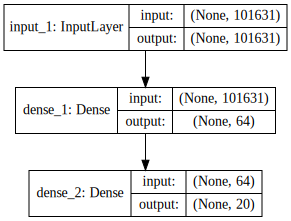

In [4]:
plot_model_in_notebook(model)

In [8]:
model.count_params()

6505748

In [9]:
x_train.shape[1] * 64 + 64 + 64 * num_classes + num_classes

6505748

In [10]:
# 4vCPU intel NUC, ~ 12s / epoch -> 2 min
model.fit(x_train, y_train, 
          batch_size=512, 
          validation_data=(x_val, y_val), 
          epochs=6, 
          shuffle=True)

Train on 9051 samples, validate on 2263 samples
Epoch 1/6
9051/9051 [==============================] - 14s 1ms/step - loss: 2.4497 - acc: 0.4729 - val_loss: 1.8982 - val_acc: 0.6673
Epoch 2/6
9051/9051 [==============================] - 12s 1ms/step - loss: 1.3907 - acc: 0.8409 - val_loss: 1.4164 - val_acc: 0.7318
Epoch 3/6
9051/9051 [==============================] - 13s 1ms/step - loss: 0.8807 - acc: 0.9019 - val_loss: 1.1943 - val_acc: 0.7477
Epoch 4/6
9051/9051 [==============================] - 12s 1ms/step - loss: 0.6309 - acc: 0.9213 - val_loss: 1.1294 - val_acc: 0.7459
Epoch 5/6
9051/9051 [==============================] - 13s 1ms/step - loss: 0.4461 - acc: 0.9453 - val_loss: 1.0125 - val_acc: 0.7609
Epoch 6/6
9051/9051 [==============================] - 12s 1ms/step - loss: 0.3426 - acc: 0.9548 - val_loss: 0.9704 - val_acc: 0.7614


Text(0.5,0,'epoch')

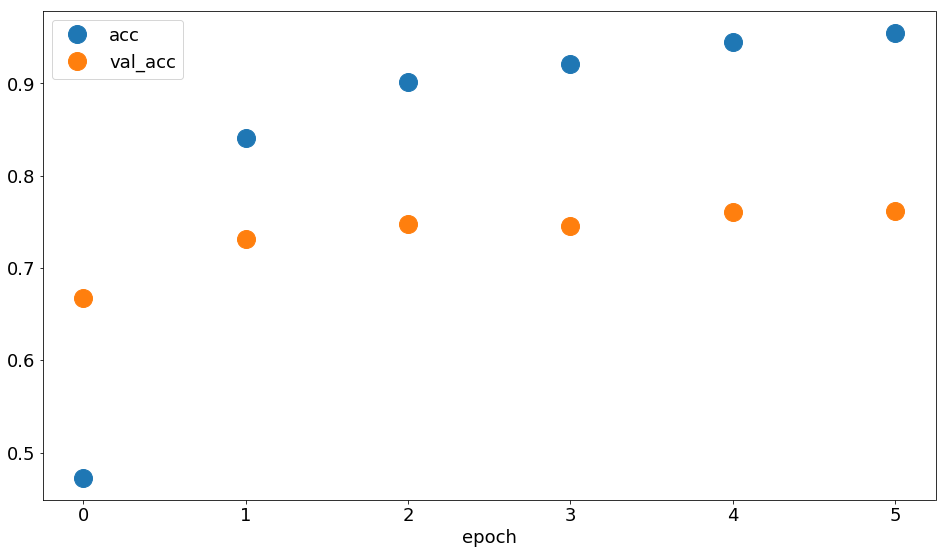

In [11]:
pd.DataFrame(model.history.history)[['acc', 'val_acc']].plot(
    figsize=(16,9), fontsize=18, style='o', markersize=18
)
plt.legend(fontsize=18)
plt.xlabel('epoch', fontsize=18)

In [12]:
preds = np.argmax(model.predict(x_test), axis=1)
accuracy_score(np.argmax(y_test, axis=1), preds)

0.686404673393521

## How do we measure performance? 
### What is considered "good"?

In [13]:
pd.Series(np.argmax(y_train, axis=1)).value_counts(normalize=True)

5     0.054359
8     0.054138
3     0.053143
9     0.053143
15    0.052922
13    0.052701
7     0.052701
4     0.052591
10    0.052480
11    0.052370
2     0.052259
12    0.052149
6     0.051928
1     0.051486
17    0.050381
14    0.050050
16    0.047951
0     0.041763
18    0.039112
19    0.032372
dtype: float64

In [14]:
most_popular_class = np.argmax(y_train.sum(axis=0))
print('most popular class {}: {}'.format(
    most_popular_class, data_train.target_names[most_popular_class]
))
accuracy_score(
    np.argmax(y_test, axis=1), 
    most_popular_class * np.ones(y_test.shape[0])
)

most popular class 5: comp.windows.x


0.0524429102496017

In [15]:
# Recall- logistic regression got ~60% accuracy

In [18]:
lr = LogisticRegression()
lr.fit(x_train, np.argmax(y_train, axis=1))
accuracy_score(np.argmax(y_test, axis=1), lr.predict(x_test))

0.6015666489644185

# Recap: What did we do:

## Document classification:
 - given a document I want to classify it into a __known__ set of categories
 - Usage case: now I can assign a category to a new, unknown document

## Count Words:
 - AKA: one hot encoding, bag of words
 - Make covariates/features of shape $N_{documents}$ x $N_{words}$
 
## Model:
 - baseline model: 5% accuracy 
 - logistic regression: 60% accuracy
 - Single hidden layer NN: 67% accuracy
 
$ \\ $
$ \\ $
$ \\ $
# We've only used the same `features` on a more complex `model`
# We want to add model complexity
 - Get a bigger dataset (we want to build bigger models
# We want to make more complex feature inputs
- Go beyond the __bag of words__ features 

### Safe to restart here

# Let's grab a bigger dataset!

In [37]:
import numpy as np
import pandas as pd
%pylab inline

import keras
import keras.backend as K

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

Populating the interactive namespace from numpy and matplotlib


# Stanford IMDB dataset
### http://ai.stanford.edu/~amaas/data/sentiment/

## Stats:
 - 50k movie reviews of popular movies
 - each one is labeled as `positive` or `negative`

# A Negative Review:
### As a history nut who is particularly interested in this particular historical event, I was very disappointed with the movie. Granted, the costumes and staging was quite authentic, but the Hollywood portrayal of this "British Little Big Horn" was truly boring.<br /><br />The amount of film footage dedicated to marching or parading troops has to have been unprecedented in film history. Eveytime I heard triumphant background music begin, I knew I had to prepare myself for another laborious scene of meaningless filler. Obviously, the producers had invested heavily into "staging" and were determined to get their money's worth.<br /><br />Despite the outstanding cast, their dialogue was, again, boring and their characters were never developed. Whenever Peter O'toole or Burt Lancaster finished a scene, I would cringe with disappointment. Their given lines were so weak and meaningless that I could hardly believe these were the same two great actors who portrayed Lawrence of Arabia and the Bird Man of Alcatraz respectively.<br /><br />There are worse epics, but this one is not much better

$ \\ $
$ \\ $
$ \\ $
# A Positive Review:
### An American in Paris is a wonderful musical about an American painter living in Paris for inspiration. He meets a rich woman who admires his paintings on the street and she believes she can get his work to be even more popular to the public, e.g. in a museum. Golden Globe nominated Gene Kelly as the artist Jerry Mulligan is just perfect at both singing and especially dancing. He also meets the main girl Lise Bouvier (Leslie Caron) who is engaged to his best friend. He can't help his feelings for this girl, even after he finds out who she is engaged to. Filled with nice romance and wonderful song and dance, this is a very good musical film. It may drag slightly with his dancing dream sequence, i.e. The American in Paris ballet, but there is a good happy ending. It won the Oscars for Best Art Direction-Set Decoration, Best Cinematography, Best Costume Design, Best Music, Scoring of a Musical Picture, Best Writing, Story and Screenplay and Best Picture, and it was nominated for Best Director for Vincente Minnelli and Best Film Editing, it was nominated the BAFTA for Best Film from any Source, and it won the Golden Globe for Best Motion Picture - Musical/Comedy, and it was nominated for Best Director for Vincente Millenni (Liza's father). Gene Kelly was number 66 on The 100 Movie Stars, and he was number 15 on 100 Years, 100 Stars - Men, "I Got Rhythm" was number 32 on 100 Years, 100 Songs, the film was number 9 on 100 Years of Musicals, it was number 39 on 100 Years, 100 Passions, it was number 68 on 100 Years, 100 Movies, and it was number 58 on The 100 Greatest Musicals. Very good!

# Why is it so hard? 

# A Negative Review:
### As a history nut who is particularly interested in this particular historical event, I was very disappointed with the movie. Granted, the costumes and staging was quite authentic, but the Hollywood portrayal of this "British Little Big Horn" was truly boring.<br /><br />The amount of film footage dedicated to marching or parading troops has to have been unprecedented in film history. Eveytime I heard triumphant background music begin, I knew I had to prepare myself for another laborious scene of meaningless filler. Obviously, the producers had invested heavily into "staging" and were determined to get their money's worth.<br /><br />`**Despite the outstanding cast**`, their dialogue was, again, boring and their characters were never developed. Whenever Peter O'toole or Burt Lancaster finished a scene, I would cringe with disappointment. Their given lines were so weak and meaningless that I could hardly believe these were the same `**two great actors**` who portrayed Lawrence of Arabia and the Bird Man of Alcatraz respectively.<br /><br />There are worse epics, but this one is not much better

$ \\ $
$ \\ $
$ \\ $
# A Positive Review:
### An American in Paris is a wonderful musical about an American painter living in Paris for inspiration. He meets a rich woman who admires his paintings on the street and she believes she can get his work to be even more popular to the public, e.g. in a museum. Golden Globe nominated Gene Kelly as the artist Jerry Mulligan is just perfect at both singing and especially dancing. He also meets the main girl Lise Bouvier (Leslie Caron) who is engaged to his best friend. He can't help his feelings for this girl, even after he finds out who she is engaged to. Filled with nice romance and wonderful song and dance, this is a very good musical film. `**It may drag**` slightly with his dancing dream sequence, i.e. The American in Paris ballet, but there is a good happy ending. It won the Oscar for Best Art Direction-Set Decoration, Best Cinematography, Best Costume Design, Best Music, Scoring of a Musical Picture, Best Writing, Story and Screenplay and Best Picture, and it was nominated for Best Director for Vincente Minnelli and Best Film Editing, it was nominated the BAFTA for Best Film from any Source, and it won the Golden Globe for Best Motion Picture - Musical/Comedy, and it was nominated for Best Director for Vincente Millenni (Liza's father). Gene Kelly was number 66 on The 100 Movie Stars, and he was number 15 on 100 Years, 100 Stars - Men, "I Got Rhythm" was number 32 on 100 Years, 100 Songs, the film was number 9 on 100 Years of Musicals, it was number 39 on 100 Years, 100 Passions, it was number 68 on 100 Years, 100 Movies, and it was number 58 on The 100 Greatest Musicals. Very good!

$ \\ $
$ \\ $
$ \\ $

# Why do I care about sentiment analysis? 

### Maybe you do: I want to trade the next xbox release:
 - How do I figure out what people on reddit think about the xbox? 

$ \\ $
### Maybe you don't... it is often a proxy for something else that is measurable
 - e.g. stock price

## IMDB data in keras
### Keras will make this easy
 - It will give us the text as numbers

In [3]:
from keras.datasets import imdb
imdb.load_data?

Using TensorFlow backend.


Signature: imdb.load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
Docstring:
Loads the IMDB dataset.

# Arguments
    path: where to cache the data (relative to `~/.keras/dataset`).
    num_words: max number of words to include. Words are ranked
        by how often they occur (in the training set) and only
        the most frequent words are kept
    skip_top: skip the top N most frequently occurring words
        (which may not be informative).
    maxlen: sequences longer than this will be filtered out.
    seed: random seed for sample shuffling.
    start_char: The start of a sequence will be marked with this character.
        Set to 1 because 0 is usually the padding character.
    oov_char: words that were cut out because of the `num_words`
        or `skip_top` limit will be replaced with this character.
    index_from: index actual words with this index and higher.

# Returns
    Tuple of Numpy array

# NOTE:
## This will return INTEGER SEQUENCES
## We will truncate our vocabulary for convenience
 - only use the most common ~10000 words

## We restrict ourselves to the 10000 most-common words

In [4]:
MAX_WORDS = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [50]:
x_train[2][:10]

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108]

In [55]:
max(word for sent in x_train for word in sent)
# reason why it is 9999: we defined that the maximum number of words in 1 document can only be 10000

1.0

In [51]:
y_train[0:8]

array([1, 0, 0, 1, 0, 0, 1, 0])

In [8]:
from keras.preprocessing.text import Tokenizer
tok = Tokenizer(num_words=MAX_WORDS)
tok.sequences_to_matrix?

Signature: tok.sequences_to_matrix(sequences, mode='binary')
Docstring:
Converts a list of sequences into a Numpy matrix.

# Arguments
    sequences: list of sequences
        (a sequence is a list of integer word indices).
    mode: one of "binary", "count", "tfidf", "freq"

# Returns
    A Numpy matrix.

# Raises
    ValueError: In case of invalid `mode` argument,
        or if the Tokenizer requires to be fit to sample data.
File:      ~/anaconda3/envs/MIT/lib/python3.6/site-packages/keras_preprocessing/text.py
Type:      method


In [9]:
def text_sequence_to_numpy_array(seqs, num_words=MAX_WORDS):
    return Tokenizer(num_words=num_words).sequences_to_matrix(seqs, mode='binary')

x_train = text_sequence_to_numpy_array(x_train)
x_test = text_sequence_to_numpy_array(x_test)

In [56]:
x_train.shape
# 25000: number of documents
# 10000: number of words --> this is the number that we defined above (MAX_WORDS)

(25000, 10000)

In [9]:
cut = int(0.8 * x_train.shape[0])
x_train, x_val = x_train[:cut], x_train[cut:]
y_train, y_val = y_train[:cut], y_train[cut:]

In [10]:
x_train.shape, y_train.shape

((20000, 10000), (20000,))

## This is a pretty balanced problem

In [11]:
y_train.mean()

0.50155

# Start with a baseline of Logistic Regression

In [57]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_score(y_test, lr.predict(x_test))

/Users/hermannviktor/anaconda3/envs/MIT/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.86204

In [58]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.optimizers import RMSprop
import keras.backend as K

K.clear_session()
word_input = Input(shape=(MAX_WORDS,))
hidden_state = Dense(512, activation='relu')(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)
model = Model(word_input, output)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [60]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

plot_model_in_notebook(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [61]:
model.count_params()

5194497

In [16]:
model.fit(x_train, y_train, 
          validation_data=(x_val, y_val), 
          epochs=5, 
          shuffle=True, 
          batch_size=128
         )

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 19s 967us/step - loss: 0.4265 - acc: 0.8067 - val_loss: 0.2731 - val_acc: 0.8904
Epoch 2/5
20000/20000 [==============================] - 18s 910us/step - loss: 0.2484 - acc: 0.9079 - val_loss: 0.3006 - val_acc: 0.8890
Epoch 3/5
20000/20000 [==============================] - 20s 983us/step - loss: 0.1913 - acc: 0.9323 - val_loss: 0.3117 - val_acc: 0.8938
Epoch 4/5
20000/20000 [==============================] - 19s 956us/step - loss: 0.1482 - acc: 0.9500 - val_loss: 0.4131 - val_acc: 0.8896
Epoch 5/5
20000/20000 [==============================] - 19s 949us/step - loss: 0.1066 - acc: 0.9677 - val_loss: 0.4730 - val_acc: 0.8848


Text(0.5, 0, 'epoch')

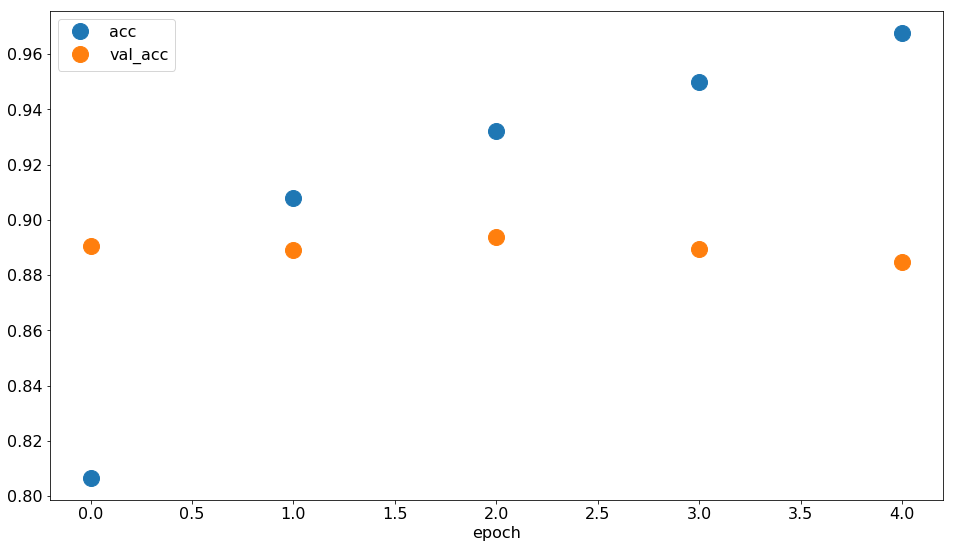

In [17]:
pd.DataFrame(
    model.history.history
)[['acc', 'val_acc']].plot(
    figsize=(16,9), 
    fontsize=16, 
    style='o', 
    markersize=16
)
plt.legend(fontsize=16)
plt.xlabel('epoch', fontsize=16)

In [18]:
accuracy_score(y_test, (model.predict(x_test)>0.5).astype(float))

0.86968

# Question:
## Why is test-accuracy worse than val?
## The network has "seen" neither

# Now we have a bigger dataset- we can fit bigger models

# Bag of Words is very popular, but it has its limits
# Go to slides

# PART III: BEYOND THE BAG OF WORDS:

# We can try to remedy some of these problems!

## Remember our old, complex ANN model?

In [62]:
K.clear_session()

word_input = Input(shape=(MAX_WORDS,))
hidden_state = Dense(512, activation='relu')(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)
model = Model(word_input, output)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


plot_model_in_notebook(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

# The first "hidden state" is a representation of words!
## Each unit vector (a word) in the input space corresponds to a 512-dimensional vector in the first hidden layer
## This representation is __LEARNED__ from the task at hand

# Keras makes this easy!

# Word Embeddings:
AKA word vectors
## Represent words as vectors in a smaller, contiuous space.



## What does this get us?
### Problem solved: Input space can be dense

### Maybe we can impart more "meaning" into the word vectors
 - Goal: similar words will have similar representations

### We can leverage other text to help
 - We can use word-vectors taken from elsewhere to help in our sentiment prediction problem!

### Word Order
 - The above did not consider word order (we averaged over all the words)
 - We will see (next lecture) how word-vectors let us make models that respect word order

# Word2Vec (a type of embedding)
## Hypothesis: words that appear in similar contexts have similar meanings

# GO TO SLIDES

# Let's make an model with an embedding
## Recipe:
1. Load the data as usual integer sequences
2. "Pad" the sequences so they are all the same length
 - longer sequences will be truncated
 - shorter sequences get a lot of `0`s appended to them
 - have not fear- keras makes this easy
 - Don't worry: `keras` makes this easy too
 
$ \\ $ 
$ \\ $ 
## The network will try to learn the right embedding for the problem

In [63]:
from keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_SEQ_LEN = 125


In [64]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [66]:
# "Pad" the sequences

x_train = pad_sequences(
    x_train, maxlen=MAX_SEQ_LEN, value=0.0)
x_test = pad_sequences(
    x_test, maxlen=MAX_SEQ_LEN, value=0.0)


# split into train and val

cut = int(0.8 * x_train.shape[0])
x_train, x_val = x_train[:cut], x_train[cut:]
y_train, y_val = y_train[:cut], y_train[cut:]

print(x_train.shape, x_test.shape)

# number of rows: how many documents there are
# number of columns: how many neurons a specific words should be put together

(16000, 125) (25000, 125)


In [22]:
x_train[1]

array([ 130, 4901,   19,    4, 1002,    5,   89,   29,  952,   46,   37,
          4,  455,    9,   45,   43,   38, 1543, 1905,  398,    4, 1649,
         26, 6853,    5,  163,   11, 3215,    2,    4, 1153,    9,  194,
        775,    7, 8255,    2,  349, 2637,  148,  605,    2, 8003,   15,
        123,  125,   68,    2, 6853,   15,  349,  165, 4362,   98,    5,
          4,  228,    9,   43,    2, 1157,   15,  299,  120,    5,  120,
        174,   11,  220,  175,  136,   50,    9, 4373,  228, 8255,    5,
          2,  656,  245, 2350,    5,    4, 9837,  131,  152,  491,   18,
          2,   32, 7464, 1212,   14,    9,    6,  371,   78,   22,  625,
         64, 1382,    9,    8,  168,  145,   23,    4, 1690,   15,   16,
          4, 1355,    5,   28,    6,   52,  154,  462,   33,   89,   78,
        285,   16,  145,   95], dtype=int32)

# What is the shape of our input going to be? 
## We have sequences of `MAX_SEQ_LEN` integers (max value of `MAX_WORDS`)
$ \\ $ 
```
x_train = pad_sequences(x_train, maxlen=MAX_SEQ_LEN)
```
$ \\ $ 

## EACH WORD gets "embedded" and becomes a $d_{embedding}$-dimensional, dense vector.
$ \\ $ 
$ \\ $ 
```
word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN)(word_input)
```
$ \\ $ 
$ \\ $ 
## Our inputs into our network will be shape  $d_{embedding}$ x $\text{MAX_WORDS}$
$ \\ $ 
$ \\ $ 
## This is not only a new shape, its a new size ($2$-d inputs)

# Two options:
 - use `3-d` tensors to operate on our inputs (harder)
 - manipulate our input to be `1-d` (easier)

$ \\ $
$ \\ $

# How to change vector shapes? 
 - average across one dimension
 - "unroll" the dimensions

$ \\ $ 
$ \\ $ 
# Question:
## What did we do with the 2-D images in mnist?

In [22]:
lol = [
    ['I', 'went', 'to', 'the', 'store.'],
    ['I', 'really', 'like', 'Keras.'],
    ['Neural', 'networks', 'are', 'awesome.']
]

flattened_list = []
for l in lol:
    flattened_list = flattened_list + l
    # could also be: flattened_list.extend(l)

flattened_list

['I',
 'went',
 'to',
 'the',
 'store.',
 'I',
 'really',
 'like',
 'Keras.',
 'Neural',
 'networks',
 'are',
 'awesome.']

## Question: What are the pros and cons of the two approaches? 

In [68]:
EMBEDDING_DIM = 100

## Average together the embedding vectors over all the words
### Do so right after the embedding
$ \\ $
## $\text{MAX_SEQ_LEN}$ x $d_{embedding} \rightarrow \text{  } d_{embedding}$

In [69]:
from keras.layers import Embedding, GlobalAveragePooling1D
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(MAX_WORDS, 
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQ_LEN)(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(256, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(32, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)
model = Model(word_input, output)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [70]:
plot_model_in_notebook(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [27]:
model.count_params()

1034113

In [49]:
model.fit(x_train, y_train, 
          validation_data=(x_val, y_val), 
          epochs=5, 
          shuffle=True, 
          batch_size=128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 6s 309us/step - loss: 0.5883 - acc: 0.6885 - val_loss: 0.3879 - val_acc: 0.8332
Epoch 2/5
20000/20000 [==============================] - 6s 282us/step - loss: 0.3661 - acc: 0.8431 - val_loss: 0.3297 - val_acc: 0.8610
Epoch 3/5
20000/20000 [==============================] - 6s 282us/step - loss: 0.3076 - acc: 0.8762 - val_loss: 0.3162 - val_acc: 0.8696
Epoch 4/5
20000/20000 [==============================] - 6s 281us/step - loss: 0.2772 - acc: 0.8941 - val_loss: 0.3088 - val_acc: 0.8694
Epoch 5/5
20000/20000 [==============================] - 6s 279us/step - loss: 0.2576 - acc: 0.8990 - val_loss: 0.3126 - val_acc: 0.8676


Text(0.5,0,'epoch')

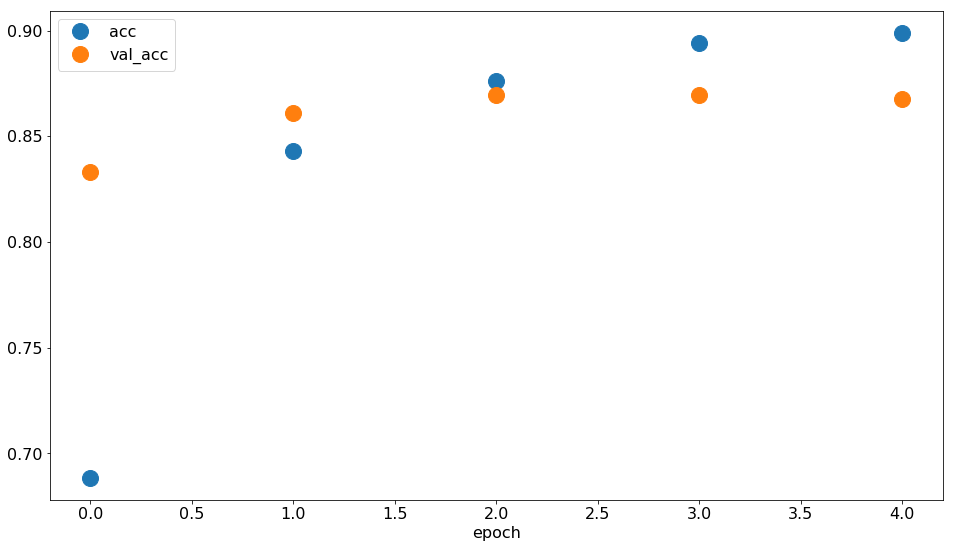

In [50]:
pd.DataFrame(
    model.history.history
)[['acc', 'val_acc']].plot(
    figsize=(16,9), 
    fontsize=16, 
    style='o', 
    markersize=16
)
plt.legend(fontsize=16)
plt.xlabel('epoch', fontsize=16)

In [51]:
accuracy_score(y_test, model.predict(x_test) > 0.5)

0.86468

## The opposite: Carry around 3-d tensors the whole way.
### Average at the end

In [28]:
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(MAX_WORDS, 
                         128, 
                         input_length=MAX_SEQ_LEN)(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)

model = Model(word_input, output)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


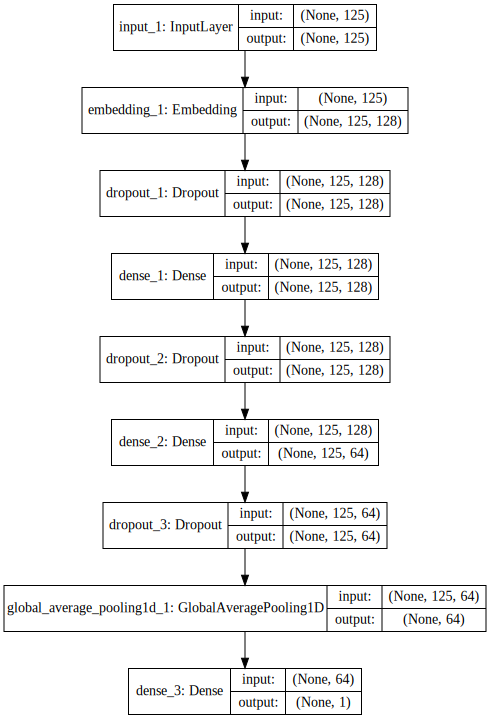

In [29]:
plot_model_in_notebook(model)

In [54]:
model.count_params()

1304833

In [33]:
model.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=5, 
    shuffle=True, 
    batch_size=128
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 14s 712us/step - loss: 0.5732 - acc: 0.7047 - val_loss: 0.4008 - val_acc: 0.8308
Epoch 2/5
20000/20000 [==============================] - 14s 681us/step - loss: 0.3297 - acc: 0.8619 - val_loss: 0.3525 - val_acc: 0.8484
Epoch 3/5
20000/20000 [==============================] - 12s 621us/step - loss: 0.2685 - acc: 0.8904 - val_loss: 0.3120 - val_acc: 0.8702
Epoch 4/5
20000/20000 [==============================] - 12s 602us/step - loss: 0.2367 - acc: 0.9044 - val_loss: 0.3994 - val_acc: 0.8324
Epoch 5/5
20000/20000 [==============================] - 12s 603us/step - loss: 0.2156 - acc: 0.9158 - val_loss: 0.3176 - val_acc: 0.8688


Text(0.5,0,'epoch')

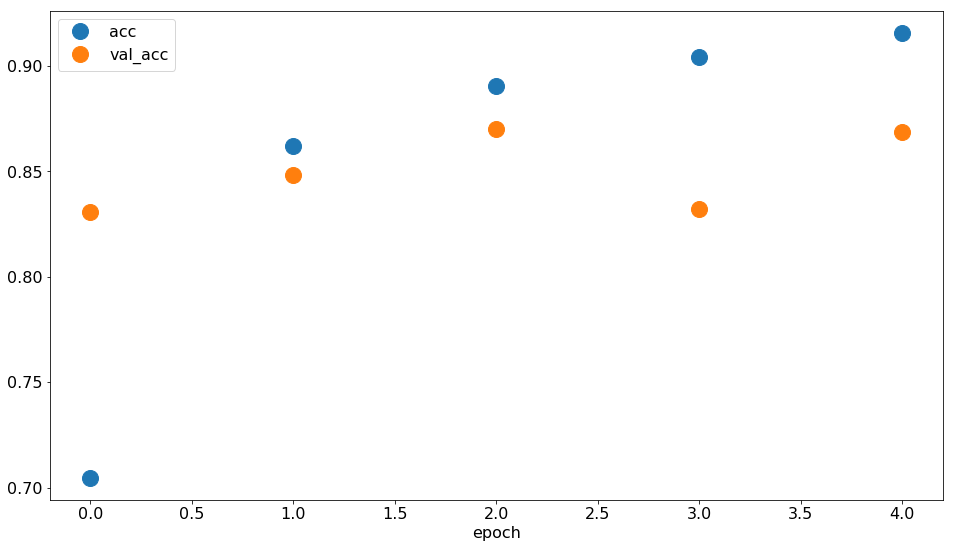

In [34]:
pd.DataFrame(model.history.history)[['acc', 'val_acc']].plot(
    figsize=(16,9), fontsize=16, style='o', markersize=16
)
plt.legend(fontsize=16)
plt.xlabel('epoch', fontsize=16)

In [35]:
accuracy_score(y_test, model.predict(x_test) > 0.5)

0.86208

# Different Approach: Flattening
###  "Unwind" the tensor

In [32]:
from keras.layers import Flatten
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(
    MAX_WORDS, 
    128, 
    input_length=MAX_SEQ_LEN)(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Flatten()(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)

model = Model(word_input, output)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


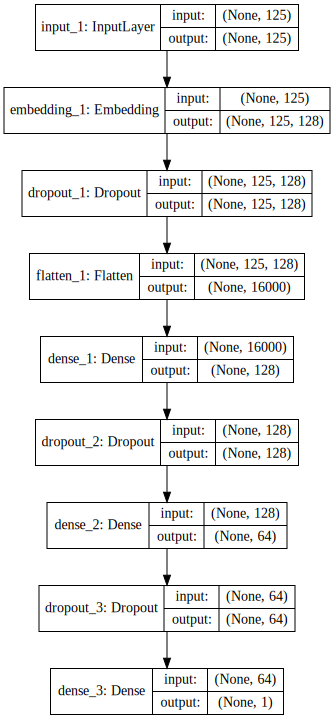

In [33]:
plot_model_in_notebook(model)

In [34]:
model.count_params()

3336449

## NOTE: more parameters!

In [35]:
model.fit(
    x_train, y_train, 
    validation_data=(x_val, y_val), 
    epochs=5, 
    shuffle=True, 
    batch_size=128
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 16s 783us/step - loss: 0.5970 - acc: 0.6468 - val_loss: 0.3922 - val_acc: 0.8222
Epoch 2/5
20000/20000 [==============================] - 17s 853us/step - loss: 0.2979 - acc: 0.8773 - val_loss: 0.3411 - val_acc: 0.8534
Epoch 3/5
20000/20000 [==============================] - 18s 882us/step - loss: 0.1586 - acc: 0.9402 - val_loss: 0.3969 - val_acc: 0.8452
Epoch 4/5
20000/20000 [==============================] - 17s 850us/step - loss: 0.0753 - acc: 0.9742 - val_loss: 0.5352 - val_acc: 0.8372
Epoch 5/5
20000/20000 [==============================] - 17s 865us/step - loss: 0.0394 - acc: 0.9869 - val_loss: 0.6314 - val_acc: 0.8466


Text(0.5, 0, 'epoch')

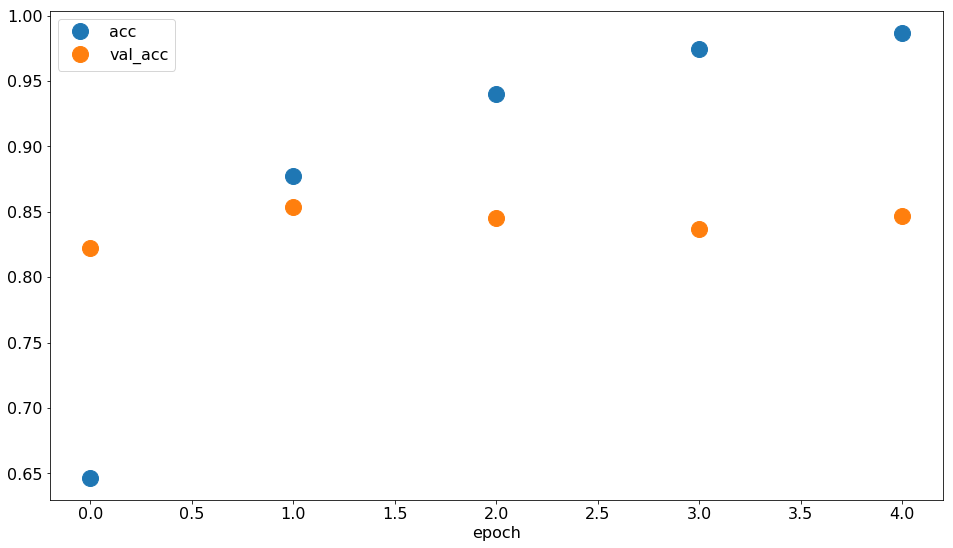

In [36]:
pd.DataFrame(model.history.history)[['acc', 'val_acc']].plot(
    figsize=(16,9), fontsize=16, style='o', markersize=16
)
plt.legend(fontsize=16)
plt.xlabel('epoch', fontsize=16)

In [60]:
accuracy_score(y_test, model.predict(x_test) > 0.5)

0.84244

# PART IV: PRETRAINED WORD EMBEDDINGS

# Using a pretrained word embedding

# train a model with word vectors from elsewhere

 - safe to restart notebook

# We will use a different kind of word embedding called GloVe
## https://nlp.stanford.edu/projects/glove/
$ \\ $

## GloVe is based on co-occurence of words in documents

## Pre-trained word vectors on huge corpora exist:
 - Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip
 - Common Crawl (42B tokens, 1.9M vocab, uncased, 300d vectors, 1.75 GB download): glove.42B.300d.zip
 - Common Crawl (840B tokens, 2.2M vocab, cased, 300d vectors, 2.03 GB download): glove.840B.300d.zip
 - Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB download): glove.twitter.27B.zip

### You can download them from here
### http://nlp.stanford.edu/data/glove.6B.zip  

In [1]:
import numpy as np
import pandas as pd
%pylab inline

import keras
import keras.backend as K

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [3]:
def load_glove_file(filepath):
    word_to_vector = {}
    with open(filepath) as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            word_to_vector[word] = vector
    return word_to_vector

#word_vecs = load_glove_file('/home/mikey/sloan-course/data/glove/glove.6B.50d.txt')
#word_vecs = load_glove_file('/home/mikey/Documents/data/glove/glove.6B.50d.txt')
word_vecs = load_glove_file('/Users/hermannviktor/Python/Databases/glove.6B.50d.txt')

In [4]:
len(word_vecs)

400000

In [5]:
word_vecs['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [5]:
pd.DataFrame.from_dict(word_vecs, orient='index').head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
def most_similar(embeddings_df, word, topn=10):
    ser = embeddings_df.loc[word]
    return most_similar_to_series(
        embeddings_df, 
        ser, 
        topn=topn+1
    ).drop(word)


def most_similar_to_series(embeddings_df, ser, topn=10):
    similarities = cosine_similarity(
        embeddings_df.values, 
        ser.values.reshape(1, -1)
    )
    similarities = pd.Series(
        similarities.squeeze(),
        index=embeddings_df.index
    )
    return similarities.nlargest(topn)

In [7]:
df = pd.DataFrame.from_dict(word_vecs, orient='index')

In [8]:
word = 'king'
most_similar(df, word)

prince     0.823618
queen      0.783904
ii         0.774623
emperor    0.773625
son        0.766719
uncle      0.762715
kingdom    0.754216
throne     0.753991
brother    0.749241
ruler      0.743425
dtype: float64

In [9]:
ser = df.loc['king'] - df.loc['man'] + df.loc['woman']
#ser
most_similar_to_series(df, ser)

king         0.885983
queen        0.860958
daughter     0.768451
prince       0.764070
throne       0.763497
princess     0.751273
elizabeth    0.750649
father       0.731450
kingdom      0.729616
mother       0.728001
dtype: float64

# Plan of attack
## 1. Load data
## 2. Split text into sequences of words
## 3. Turn words into ints
 - we will keep a map of word $\rightarrow$ int and int $\rightarrow$ word

## 4. Make all sequences the same length
## 5. Turn `ints` into word-vectors
## 6. Build a model

# We need the raw text for the imdb data
## free to download: http://ai.stanford.edu/~amaas/data/sentiment/

In [10]:
import os
import glob


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            if label == 'pos':
                target = 1
            else:
                target = 0
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            if label == 'pos':
                target = 1
            else:
                target = 0
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)



In [11]:
# 1. Load the data
IMDB_DIR = '/home/mikey/Documents/data/aclImdb/'
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text(IMDB_DIR)

In [12]:
print(train_docs[4])
print(y_train[4])

There is something kind of sad about seeing someone who is so good at doing something try to do something very different ... and end up being mediocre. I was thinking about Jordan playing baseball, but the same applies to Steve Martin.<br /><br />This movie is reasonably well acted and directed, but the script is a stinker. Martin did a great job adapting a classic story into a comedy in "Roxanne", but this effort to bring a Victorian drama to the contemporary scene smacks straight into a wall of implausibility. If you want to see an old story updated with some style, best to rent "Great Expectations".
0


In [13]:
# 2-3: Turn text (articles) into sequences of ints
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [14]:
tok = Tokenizer()
tok.texts_to_sequences?

In [15]:
# Some constants
MAX_WORDS = 30000
MAX_SEQ_LEN = 125
EMBEDDING_DIM = word_vecs['the'].shape[0]
EMBEDDING_DIM

50

In [16]:
tok = Tokenizer(num_words=MAX_WORDS)
tok.fit_on_texts(train_docs)

int_sequences_train = tok.texts_to_sequences(train_docs)
int_sequences_test = tok.texts_to_sequences(test_docs)


In [17]:
int_sequences_train[0][:10]

[1, 9878, 2345, 6, 206, 3, 821, 28, 4, 1]

In [18]:
reverse_lookup = {index: word for word, index in tok.word_index.items()}
[reverse_lookup.get(ii) for ii in int_sequences_train[0][:10]]

['the', 'beaver', 'trilogy', 'is', 'without', 'a', 'doubt', 'one', 'of', 'the']

In [19]:
[len(seq) for seq in int_sequences_train[:3]]

[221, 139, 70]

In [20]:
min(tok.word_index.values())

1

# We will reserve 0 as a padding value

In [21]:
# 4. Turn into same length sequences
int_sequences_train = pad_sequences(
    int_sequences_train, MAX_SEQ_LEN)
int_sequences_test = pad_sequences(
    int_sequences_test, MAX_SEQ_LEN)

In [22]:
[len(seq) for seq in int_sequences_train[:3]]

[125, 125, 125]

In [23]:
int_sequences_train[0]

array([ 2345,     6,    21, 11307,     7,     7,   100,   257,   107,
           1,  2345,     3,   168,   208,    10,    78,    25,     5,
         971,    12,    10,    97,   239,    78,   206,     1,  2043,
        6436,   307,    42,    37,     3,   350,    43,   307,    15,
           1, 10307,  3626,   550,  2419,     2,     6,   218,    50,
          14,     3,  3606,  5844,    45,   332,     3,  6436,   334,
          71,     9,   109,     3,    49,   371,  6436,     6,   181,
         160,   148,     2,    22,    67,    64,     1, 14360,     4,
           3,   191,   320,     8,    11,  2537,   500,  1983,   371,
           7,     7,    11,     6,   239,    79,    28,     4, 10307,
       12997,   115,   552,     2,    10,    59,    40,   116,     5,
          64,    32,  6538,   659,    41,     1,   201, 27631,  1992,
         277,    22,    64,    11,    19,   487,   112,    76, 20598,
        4416,  2124,    43,     4,   126,   416,   123,   171],
      dtype=int32)

In [24]:
[reverse_lookup.get(ii) for ii in int_sequences_train[0] if ii > 0]

['trilogy',
 'is',
 'not',
 'trent',
 'br',
 'br',
 'after',
 'having',
 'seen',
 'the',
 'trilogy',
 'a',
 'few',
 'times',
 'i',
 'do',
 'have',
 'to',
 'admit',
 'that',
 'i',
 'could',
 'probably',
 'do',
 'without',
 'the',
 'sean',
 'penn',
 'version',
 "it's",
 'like',
 'a',
 'try',
 'out',
 'version',
 'for',
 'the',
 'crispin',
 'glover',
 'kid',
 'section',
 'and',
 'is',
 'interesting',
 'more',
 'as',
 'a',
 'curiosity',
 'item',
 'if',
 "you're",
 'a',
 'penn',
 'fan',
 'than',
 'it',
 'being',
 'a',
 'good',
 'video',
 'penn',
 'is',
 'pretty',
 'funny',
 'though',
 'and',
 'you',
 'can',
 'see',
 'the',
 'makings',
 'of',
 'a',
 'big',
 'star',
 'in',
 'this',
 'gritty',
 'b',
 'w',
 'video',
 'br',
 'br',
 'this',
 'is',
 'probably',
 'also',
 'one',
 'of',
 'crispin',
 "glover's",
 'best',
 'roles',
 'and',
 'i',
 'would',
 'just',
 'love',
 'to',
 'see',
 'an',
 'updated',
 'documentary',
 'about',
 'the',
 'original',
 "groovin'",
 'gary',
 'once',
 'you',
 'see',
 '

## We need an embedding matrix that is ordered!

In [25]:
min(tok.word_index.values()), max(tok.word_index.values())

(1, 88582)

In [26]:
num_words = min(MAX_WORDS, len(tok.word_index) + 1)
num_words

30000

In [27]:
# make an embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in tok.word_index.items():
    if i >= MAX_WORDS:
        continue
    embedding_vector = word_vecs.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [28]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
embedding_matrix.shape

(30000, 50)

In [30]:
# split the data
inds = np.arange(int_sequences_train.shape[0])
np.random.shuffle(inds)
int_sequences_train = int_sequences_train[inds]
y_train = y_train[inds]

cut = int(0.9 * int_sequences_train.shape[0])
int_sequences_train, int_sequences_val = (
    int_sequences_train[:cut], int_sequences_train[cut:]
)
y_train, y_val = y_train[:cut], y_train[cut:]


In [31]:
int_sequences_train.shape

(22500, 125)

In [32]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout, Embedding, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.initializers import Constant
import keras.backend as K

K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')

hidden_state = Embedding(
    MAX_WORDS, 
    EMBEDDING_DIM,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=False,
    input_length=MAX_SEQ_LEN)(word_input)

hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)

output = Dense(1, activation='sigmoid')(hidden_state)

model = Model(word_input, output)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )


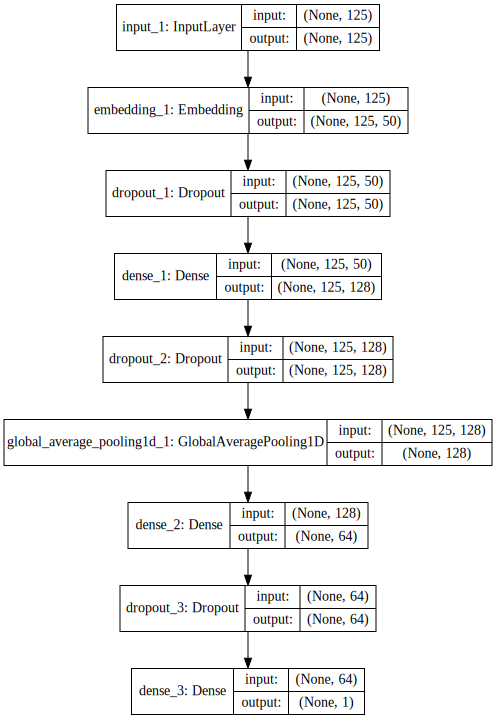

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

plot_model_in_notebook(model)

In [34]:
model.count_params()

1514849

In [35]:
model.fit(
    int_sequences_train, y_train, 
    validation_data=(int_sequences_val, y_val), 
    epochs=20, 
    shuffle=True, 
    batch_size=256, 
    verbose=1
)

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 9s 397us/step - loss: 0.6657 - acc: 0.6018 - val_loss: 0.6175 - val_acc: 0.6888
Epoch 2/20
22500/22500 [==============================] - 9s 392us/step - loss: 0.6072 - acc: 0.6778 - val_loss: 0.5663 - val_acc: 0.7292
Epoch 3/20
22500/22500 [==============================] - 9s 393us/step - loss: 0.5694 - acc: 0.7089 - val_loss: 0.5337 - val_acc: 0.7456
Epoch 4/20
22500/22500 [==============================] - 9s 392us/step - loss: 0.5477 - acc: 0.7244 - val_loss: 0.5271 - val_acc: 0.7500
Epoch 5/20
22500/22500 [==============================] - 8s 376us/step - loss: 0.5359 - acc: 0.7375 - val_loss: 0.5151 - val_acc: 0.7564
Epoch 6/20
22500/22500 [==============================] - 9s 379us/step - loss: 0.5256 - acc: 0.7439 - val_loss: 0.5016 - val_acc: 0.7648
Epoch 7/20
22500/22500 [==============================] - 9s 380us/step - loss: 0.5177 - acc: 0.7472 - val_loss: 0.4870 - v

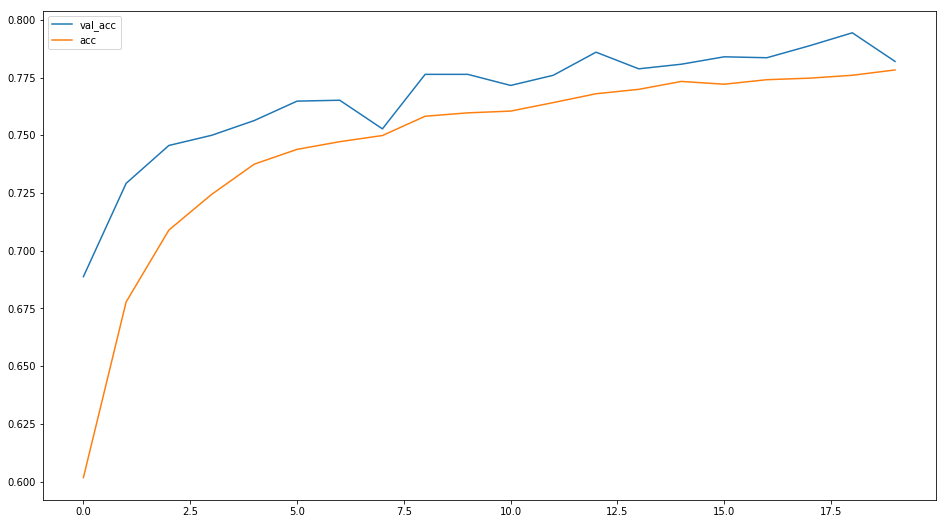

In [36]:
acc_cols = ['val_acc', 'acc']
pd.DataFrame(model.history.history)[acc_cols].plot(figsize=(16,9))

In [37]:
#accuracy_score(np.argmax(y_test, axis=1), np.argmax(model.predict(int_sequences_test), axis=1).astype(int))
accuracy_score(y_test, model.predict(int_sequences_test) > 0.5)

0.79944

## Now repeat with trainable embeddings

In [38]:
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')

hidden_state = Embedding(
    MAX_WORDS, 
    EMBEDDING_DIM,
    embeddings_initializer=Constant(embedding_matrix),
    trainable=True,
    input_length=MAX_SEQ_LEN)(word_input)

hidden_state = Dropout(0.2)(hidden_state)
hidden_state = Dense(128, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
hidden_state = Dense(64, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)

output = Dense(1, activation='sigmoid')(hidden_state)

model = Model(word_input, output)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy']
             )


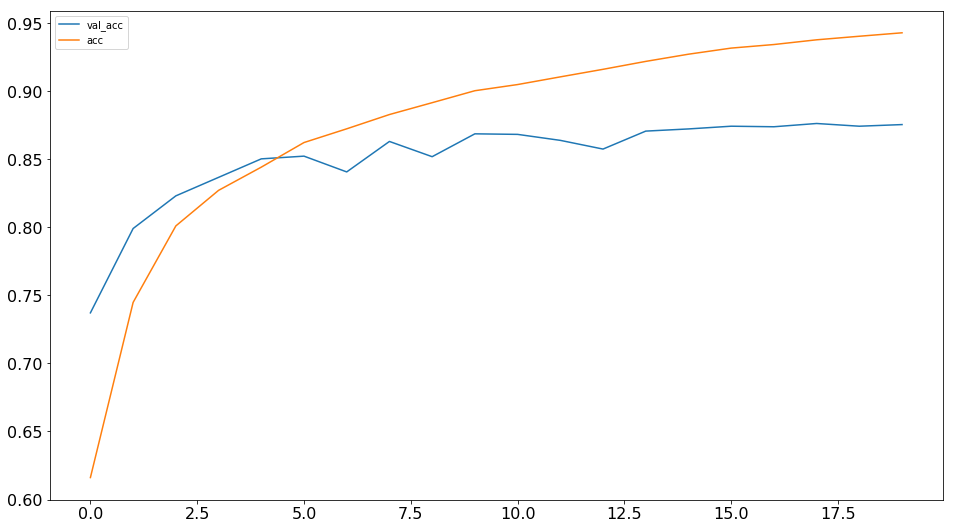

In [39]:
model.fit(int_sequences_train, y_train, 
          validation_data=(int_sequences_val, y_val), 
          epochs=20, 
          shuffle=True, 
          batch_size=256, 
          verbose=0
         )

acc_cols = ['val_acc', 'acc']
pd.DataFrame(
    model.history.history
)[acc_cols].plot(figsize=(16,9), fontsize=16)

In [40]:
accuracy_score(y_test, model.predict(int_sequences_test) > 0.5)

0.85772

# Why is this so cool?
## The ability to do semi-supervised learning here allows us to train on very little data

In [35]:
MAX_WORDS = 10000
EMBEDDING_DIM = 50

DOCS_TO_USE = 300
MAX_SEQ_LEN = 30

In [36]:
# 1. Load the data
IMDB_DIR = '/home/mikey/Documents/data/aclImdb/'
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text(IMDB_DIR)

In [37]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



tok = Tokenizer(num_words=MAX_WORDS)
tok.fit_on_texts(train_docs)

int_sequences_train = tok.texts_to_sequences(train_docs)
int_sequences_test = tok.texts_to_sequences(test_docs)

int_sequences_train = pad_sequences(
    int_sequences_train, maxlen=MAX_SEQ_LEN)
int_sequences_test = pad_sequences(
    int_sequences_test, maxlen=MAX_SEQ_LEN)

embedding_matrix = np.zeros((MAX_WORDS, EMBEDDING_DIM))
for word, i in tok.word_index.items():
    if i >= MAX_WORDS:
        continue
    embedding_vector = word_vecs.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [38]:
K.clear_session()

word_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32')
hidden_state = Embedding(MAX_WORDS, 
                         EMBEDDING_DIM, 
                         input_length=MAX_SEQ_LEN
                        )(word_input)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = GlobalAveragePooling1D()(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(256, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
hidden_state = Dense(32, activation='relu')(hidden_state)
hidden_state = Dropout(0.5)(hidden_state)
output = Dense(1, activation='sigmoid')(hidden_state)

model = Model(word_input, output)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [39]:
DOCS_TO_USE = 200

In [66]:
train_inds = np.arange(int_sequences_train.shape[0])
np.random.shuffle(train_inds)
train_inds = train_inds[:DOCS_TO_USE]

model.fit(
    int_sequences_train[train_inds], y_train[train_inds], 
    epochs=1000, 
    shuffle=True, 
    verbose=0
)


In [67]:
accuracy_score(y_test, model.predict(int_sequences_test) > 0.5)

0.6908